# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)




3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)



4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




In [322]:
#Ejercicio 3
#importamos las librerias
import numpy as np 
from scipy import optimize 
def reservorio(h):
  """
  Esta funcion crea devuelve la ecuacion que nos plantea el ejercicio y tiene como imput las diferentes alturas para crear mas adelante la grafica de la ecuacion
  anotamos los valores iniciales.
  """
  l = 10
  r = 1
  v = 12.5
  #Divido la ecuacion en a_1, a_2, a_#, por comodidad y para que me sea facil de manipular
  a_1 = (1/2)*(np.pi)*(r**2) 
  a_2 = -(r**2)*(np.arcsin(h/r))
  a_3 = (-h)*(r**2-h**2)**(1/2)
  ecuacion = l*(a_1 + a_2 + a_3) - v
  return ecuacion # Ecuacion completa

In [323]:
h = np.linspace(-1,1,101) # hacemos que la variable h sea un linspace, para usar la en la funcion y poder graficar la ecuacion con un numero de puntos que queramos 

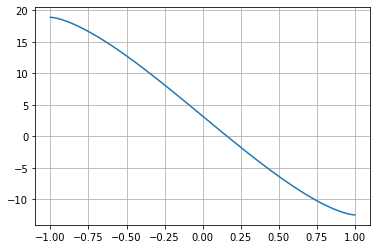

In [324]:
#Creamos una grafica para ver donde esta la raiz de la ecuacion
plt.plot(h, reservorio(h))
plt.grid()
plt.show()

In [325]:
raiz = optimize.newton(reservorio, 0) #utilizamos el metodo de newton raphson para encontrar la raiz
print(f"la profundidad del agua para L=10pies, r=1pies, V=12.4pies es h = {raiz} pies")

la profundidad del agua para L=10pies, r=1pies, V=12.4pies es h = 0.16109771551317212 pies


In [326]:
#Ejercicio 4
def alpha(x):
  """
  creamos esta funcion para que devuelva la ecuacion que nos da el ejercicio, el input de esta funcion es x, que son los angulos que vamos a usar para crear la grafica
  mas adelante 
  establecemos los valores iniciales.
  """
  l=89
  h=49
  d=55
  beta = 11.5 * np.pi/180 #como numpy recibe los valores en radianes, y el beta esta en grados, pasamos beta a radianes 
  A = l*np.sin(beta)
  B = l*np.cos(beta)
  C = (h + 0.5*d)*np.sin(beta) - 0.5*d*np.tan(beta)
  E = (h + 0.5*d)*np.cos(beta) - 0.5 * d
  ecuacion = A*np.sin(x)*np.cos(x) + B*np.sin(x)**2 - (C)*np.cos(x) - (E)*np.sin(x) 
  return ecuacion


In [327]:
x = np.linspace(0, 2*np.pi, 101) # hacemos a x un linspace para que este se use en la funcion y poder crear la grafica con el numero de puntos que queramos

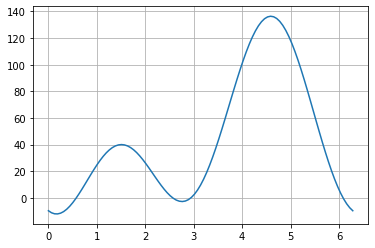

In [328]:
# creamos la grafica de la ecuacion para ver un rango en el cual esta la raiz
plt.plot(x, alpha(x))
plt.grid()
plt.show()

In [329]:
raiz = optimize.bisect(alpha,0,1) # utilizamos el metodo de biseccion para encontrar la raiz de la ecuacion respecto al rango que observamos en la grafica
raiz = raiz * 180/np.pi
print(f"Para unos valores iniciales Para  l=89 pulg,  h=49 pul,  D=55 ,  beta=11.5 nos da que alpha = {raiz}")

Para unos valores iniciales Para  l=89 pulg,  h=49 pul,  D=55 ,  beta=11.5 nos da que alpha = 32.97217482236639


# Solucion 

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [330]:
#librerias 
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

In [331]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x)

In [332]:
x = np.linspace(-2, 2, 100)

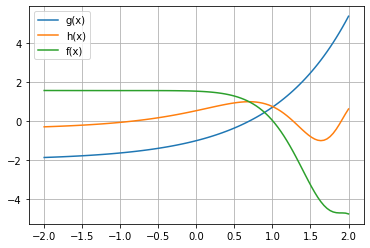

In [333]:
plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, h(x)-g(x), label="f(x)")
plt.grid()
plt.legend()

In [334]:
root1 = optimize.bisect(f, 1, 4)
print({root})

{6.113797822835222e-17}


In [335]:
# Metodo Newton Rapshod
root2 = optimize.newton(f, 3)
print({root})


{6.113797822835222e-17}


In [336]:
root1-root2

-4.147793219999585e-13

Punto 2.

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}



In [337]:
f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega))

h = lambda omega : f(omega)-g(omega)
omega = np.linspace(-np.pi/4, np.pi/4)


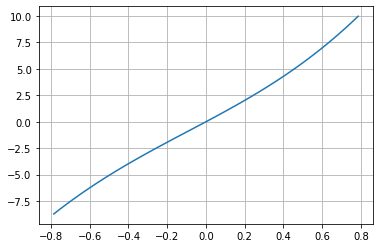

In [338]:
plt.figure()
plt.plot(omega, h(omega) )
plt.grid()

In [339]:
root = optimize.newton(h, 2)
print({root})
"""
Profe una pregunta, con respecto a este optimize.newton(h, 2), cuando cambio el 2 por un -1, la raiz da diferente que con el 2, me gustaria saber porque pasa esto,
pues pensaba que tal vez es porque tenga mas de una raiz, pero eso no es lo que indica la grafica.
"""

{6.113797822835222e-17}


'\nProfe una pregunta, con respecto a este optimize.newton(h, 2), cuando cambio el 2 por un -1, la raiz da diferente que con el 2, me gustaria saber porque pasa esto,\npues pensaba que tal vez es porque tenga mas de una raiz, pero eso no es lo que indica la grafica.\n'




5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [340]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [341]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [342]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [343]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


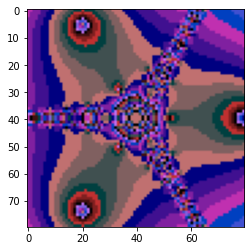

In [344]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
